In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
from IPython.core.display import display, HTML
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%reload_ext autoreload
%autoreload 1
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import seaborn as sns
sns.set(style="white")
import pandas as pd
import math

from Utils.UtilsViz import *
from Utils.DataUtils import *

In [3]:
US_coord = [37.0902, -102]
NY_COORD = [40.7128, -74.0060]

# ny_data_path = os.getcwd()
# ny_datapath = "C:\\Users\\sriharis\\OneDrive\\UChicago\\DataMining\\project\\NYData\\"
# ny_datapath = "C:\\Users\\Ssrih\\OneDrive\\UChicago\\DataMining\\project\\NYData\\"

In [12]:
# listings = pd.read_csv(os.path.join(ny_datapath, "listings.csv"))
print(os.getcwd())
ny_datapath = os.path.join(os.getcwd(), "../data/listings_no_nlp.csv")
listings = pd.read_csv(ny_datapath, index_col="Unnamed: 0")


D:\Dev\Sources\Projects\GitProjects\listings\ssh


In [13]:
listings.head()

,id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2454,2008-09-03,within a day,60%,f,1.0,1.0,"['email', 'phone']",t,f,Manhattan,40.755523,-73.967679,t,Condominium,Entire home/apt,2,1.0,0.0,2.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$137.00,NaN,NaN,1,$0.00,7,730,7,7,730,730,7.0,730.0,16,36,65,65,2019-02-01,1,1,2019-01-30,2019-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f,1,1,0,0,1.00
1,2539,2008-09-07,within an hour,100%,f,8.0,8.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.647486,-73.972370,f,Apartment,Private room,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",$149.00,$100.00,$25.00,1,$25.00,1,730,1,1,730,730,1.0,730.0,30,60,90,365,2019-02-02,9,2,2015-12-04,2018-10-19,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,8,0,5,3,0.23
2,2595,2008-09-09,within a day,60%,f,5.0,5.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,Manhattan,40.753621,-73.983774,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",$225.00,$350.00,$100.00,2,$0.00,1,1125,1,1,1125,1125,1.0,1125.0,30,60,90,365,2019-02-02,43,14,2009-11-21,2019-01-02,95.0,9.0,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,t,t,2,1,0,1,0.38
3,3330,2008-11-09,NaN,NaN,f,4.0,4.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.708558,-73.942362,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Wheelchair accessible"",Kitc...",$70.00,$150.00,$125.00,2,$50.00,5,730,5,5,730,730,5.0,730.0,2,27,37,290,2019-02-02,39,12,2010-01-04,2018-12-07,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,f,f,3,0,3,0,0.35
4,3647,2008-11-25,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,Manhattan,40.809018,-73.941902,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",$150.00,$200.00,$75.00,2,$20.00,3,7,3,3,7,7,3.0,7.0,30,60,90,365,2019-02-02,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN


Drop min and max nights columns

# Price preprocessing 

In [14]:
listings['price'] = listings['price'].str.strip('').str.strip('$').str.replace(',', '').astype('float')

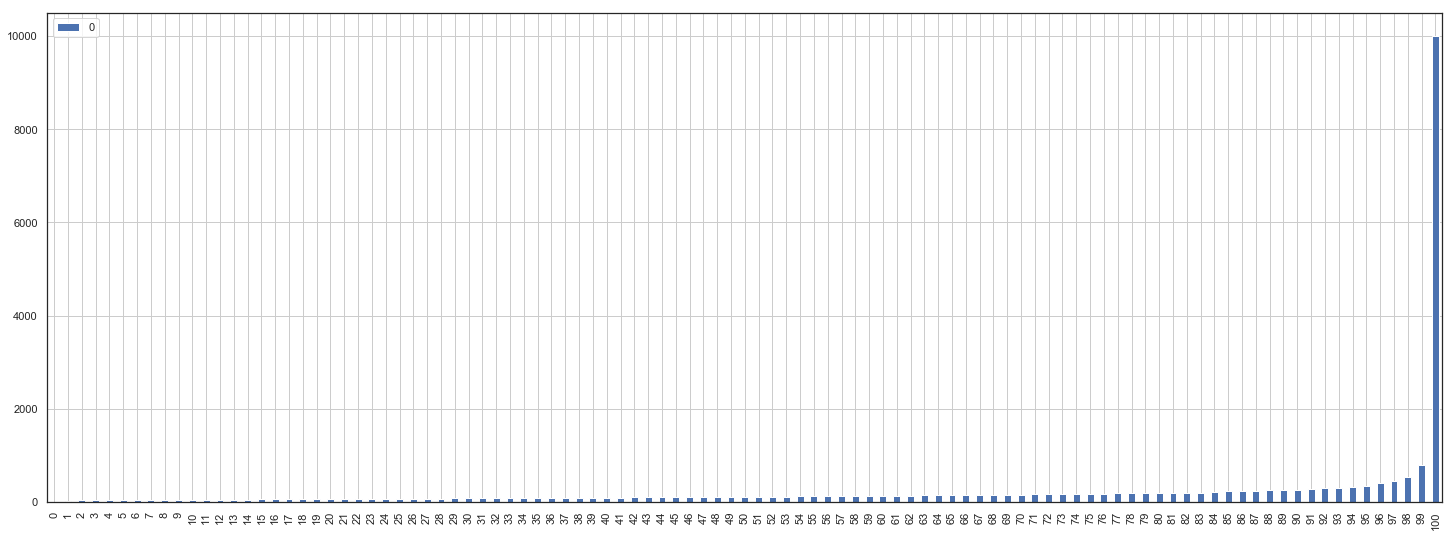

In [15]:
percentiles = list(range(0,101))
price_percentile = {}
for p in percentiles:
    price_percentile[p] = np.percentile(listings['price'].values, p)

price_percentile = pd.DataFrame.from_dict(price_percentile, orient='index')
price_percentile.plot(kind='bar', figsize=(25,9), grid=True)

In [16]:
listings = listings[listings["price"] <= price_percentile.iloc[98,:].values[0]]
listings = listings[listings["price"] >= price_percentile.iloc[1,:].values[0]]
listings["price"].describe()

count    48736.000000
mean       132.248974
std         87.747539
min         30.000000
25%         69.000000
50%        105.000000
75%        173.000000
max        525.000000
Name: price, dtype: float64

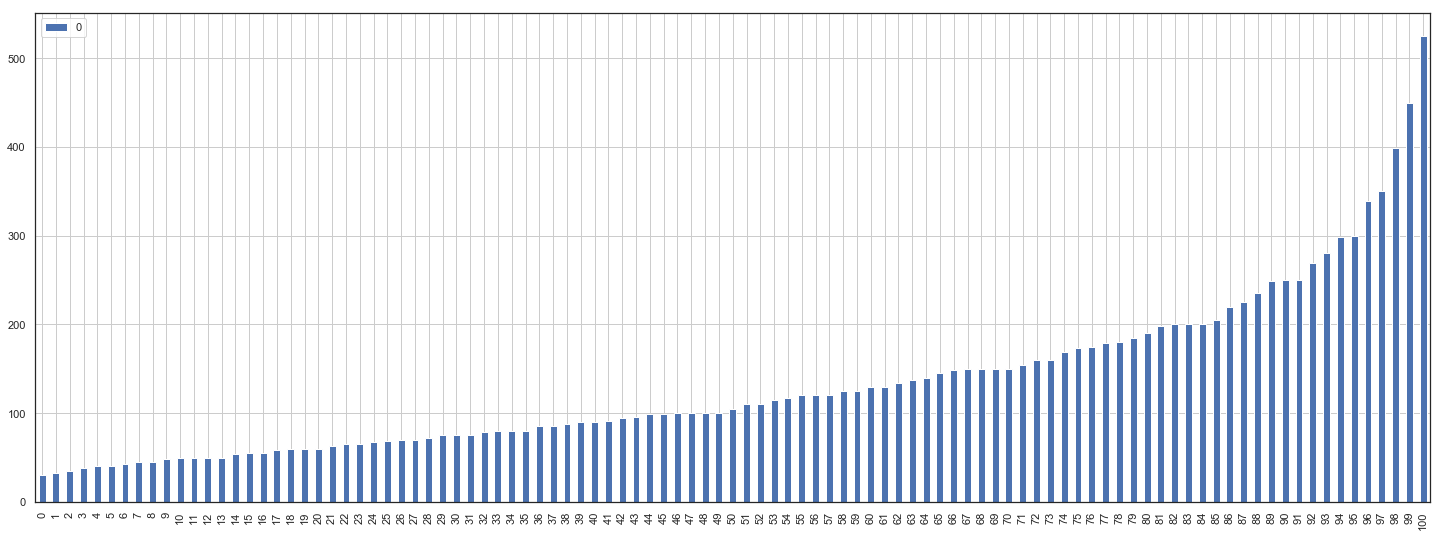

In [17]:
percentiles = list(range(0,101))
price_percentile = {}
for p in percentiles:
    price_percentile[p] = np.percentile(listings['price'].values, p)

price_percentile = pd.DataFrame.from_dict(price_percentile, orient='index')
price_percentile.plot(kind='bar', figsize=(25,9), grid=True)

No handles with labels found to put in legend.


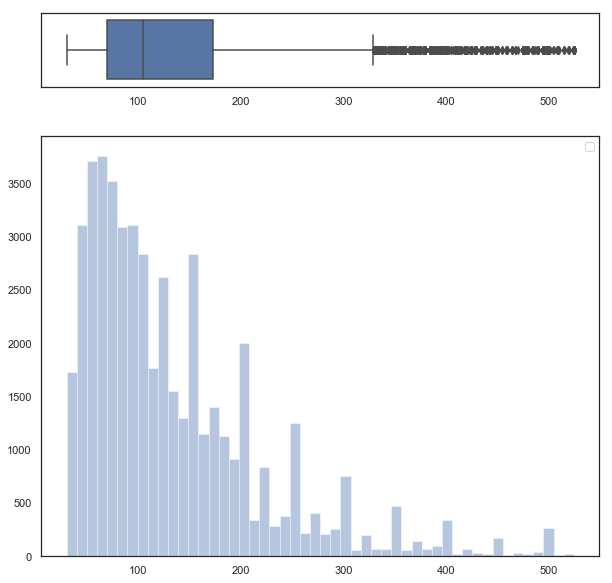

In [18]:
plot_dist(data=listings, colname="price", kde=False)

No handles with labels found to put in legend.


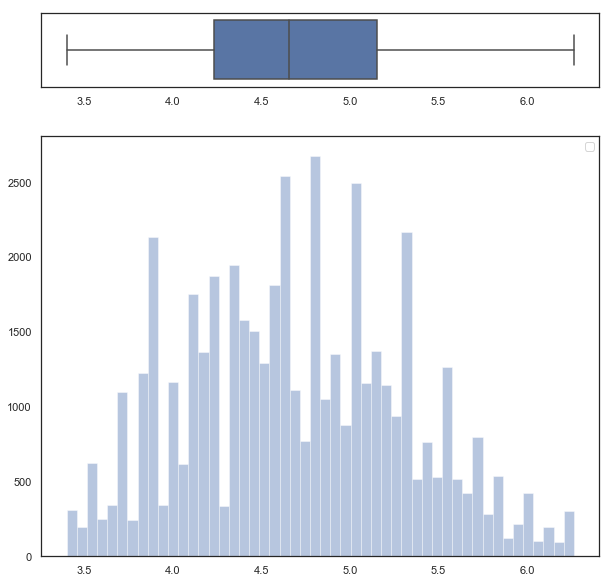

In [19]:
def get_logprice(price):
    if price <= 0.0:
        return 0.0
    else:
        return np.log(price)
listings['price_log'] = listings['price'].apply(get_logprice)
plot_dist(data=listings, colname="price_log", kde=False)

In [20]:
listings.drop("price_log", axis=1, inplace=True)

# Host response rate 

In [22]:
def get_hrr_fillval(listings):
    non_null = listings['host_response_rate'].dropna(axis=0)
    fv = non_null.str.strip('%').astype('int').median()
    return fv
listings['host_response_rate'] = listings['host_response_rate'].fillna(str(int(get_hrr_fillval(listings))))
listings['host_response_rate'] = listings['host_response_rate'].str.strip('%').astype('int')

In [31]:
def roundto(row, base=5):
    return int(base * round(float(row) / base))
listings["price_rounded"] = listings["price"].apply(roundto)

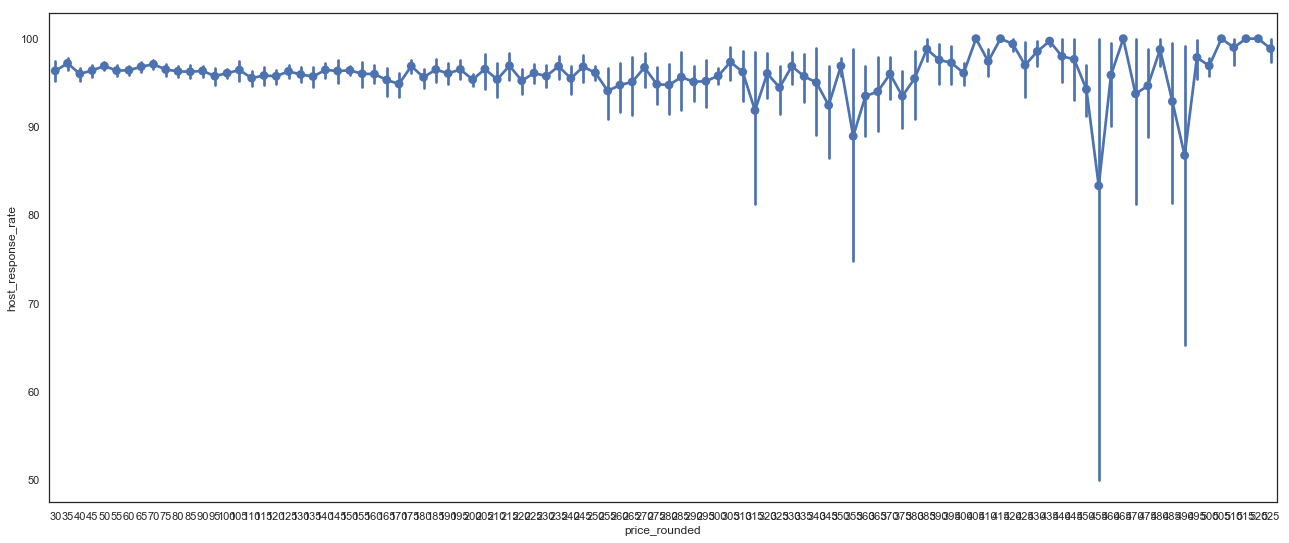

In [32]:
f, ax = plt.subplots(1,1,figsize=(22,9))
g = sns.pointplot(x=listings["price_rounded"], y=listings["host_response_rate"], ax=ax)

In [33]:
listings.drop("price_rounded", axis=1, inplace=True)

# Amenities

Let's have a look at the distribution of amenities

No handles with labels found to put in legend.


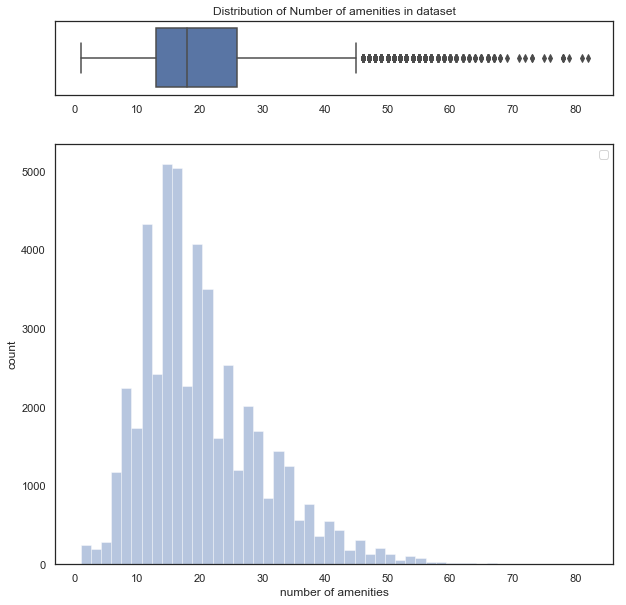

In [13]:
# Amenities
def get_num_amenities(row):
    a = row[1:-1].split(",")
    return len(a)

listings["num_amenities"] = listings["amenities"].apply(get_num_amenities)
g = plot_dist(data=listings, colname="num_amenities", xlabel="number of amenities", ylabel="count", kde=False, title="Distribution of Number of amenities in dataset")

How does price behave based on number of amenities?

Let's filter out all the prices above 500$

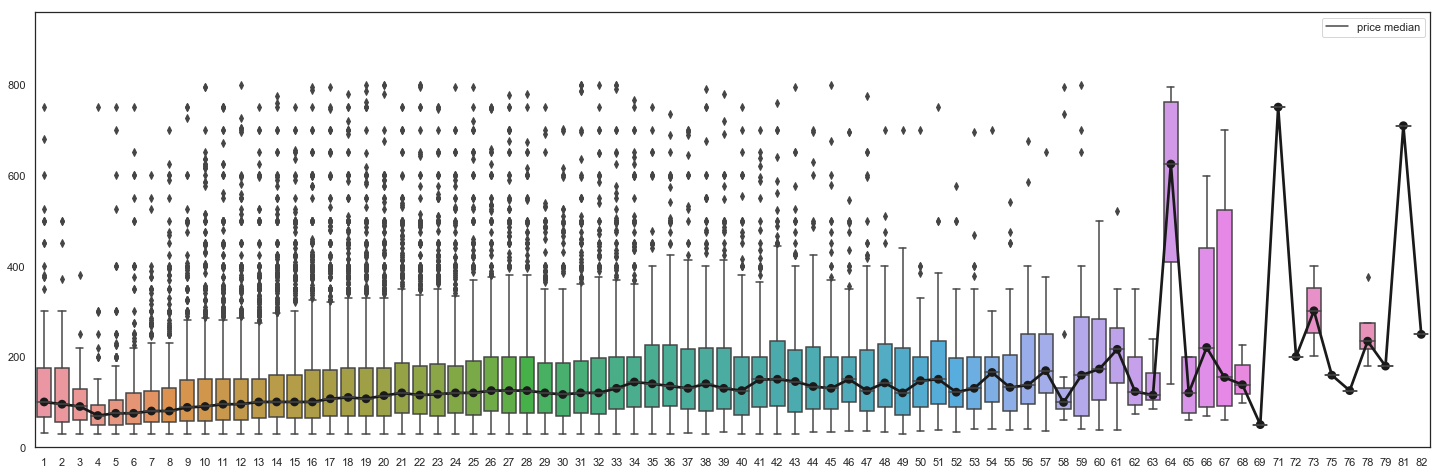

In [14]:
f, ax = plt.subplots(1,1,figsize=(25, 8))
g = plot_box(x="num_amenities", y="price", data=listings, ax=ax, agg_rule="median")

Let's group price into bins and see how behaviour is

In [15]:
bins = list(range(0,90, 10))
listings['amenities_binned'] = pd.cut(listings['num_amenities'], bins)

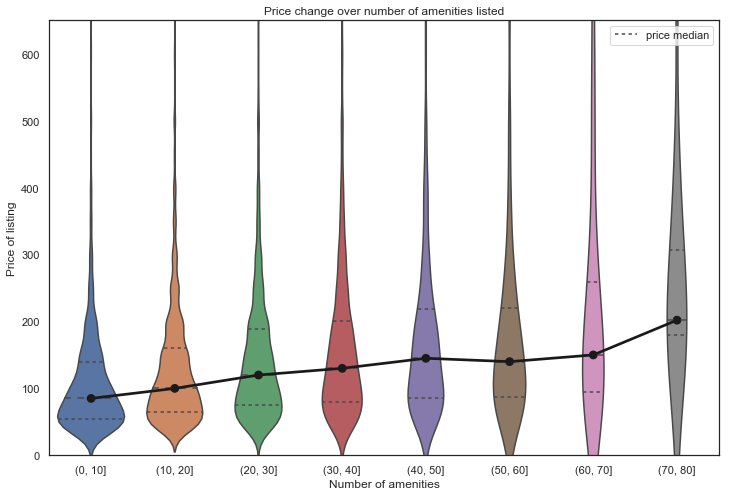

In [16]:
f, ax = plt.subplots(1,1,figsize=(12, 8))
g = plot_violin(x="amenities_binned", y="price", data=listings, ax=ax, agg_rule="median",
            title="Price change over number of amenities listed",
            xlabel="Number of amenities", ylabel="Price of listing", ylim=650)

# Accommodates 

Does the price vary significantly as accommodation increases?

In [17]:
def group_accommodates(row):
    if row < 10:
        return str(int(row))
    elif row >= 10:
        return "10+"
    else:
        return row
    
listings["acc_group"] = listings["accommodates"].apply(group_accommodates)
# listings[["bedrooms", "bedroom_group"]]

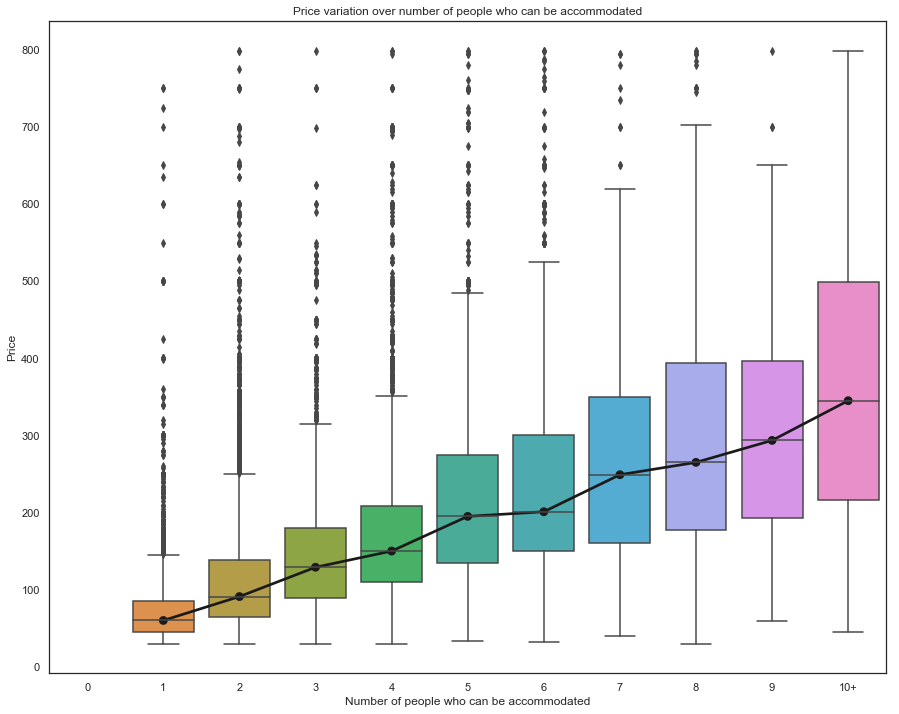

In [18]:
# f, ax = plt.subplots(1,1,figsize=(15, 12))
# g = plot_box(x="accommodates", y="price", data=listings, ax=ax, agg_rule="median", title="Price variation over number of people accommodated", xlabel="accommodates", ylabel="price")

f, ax = plt.subplots(1,1,figsize=(15, 12))

listings['acc_group'] = pd.Categorical(
    listings['acc_group'], 
    categories=['0','1','2','3','4','5','6', '7', '8', '9', '10+'], 
    ordered=True
)
listings.sort_values(by="acc_group", inplace=True)

g = sns.boxplot(x="acc_group", y="price", data=listings, ax=ax)

agg_data = listings[["price", "acc_group"]].groupby(by=["acc_group"], as_index=False).median()
g = sns.pointplot(x="acc_group", y="price", data=agg_data, ax=ax, color="k")
t = g.set(title="Price variation over number of people who can be accommodated", xlabel="Number of people who can be accommodated", ylabel="Price")


#  Bathrooms, Bedrooms and Beds

Manhattan is definitely the most expensive.

In [19]:
cols = ["bathrooms", "bedrooms", "beds"]
listings[cols].describe()

,bathrooms,bedrooms,beds
count,49185.000000,49208.000000,49210.000000
mean,1.135814,1.173529,1.536862
std,0.404808,0.737600,1.059946
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000
max,7.500000,11.000000,21.000000


Bathrooms and bedrooms may not add as much value to the dataset when over 75% of the column is just 1. 

Beds can be filled with the median, 1.0

# Security Deposit

In [20]:
listings['security_deposit'] = listings['security_deposit'].dropna(axis=0).str.strip('$').str.replace(',', '').astype('float')

In [21]:
tmp = listings[["price", "security_deposit"]]
tmp = tmp.dropna()
tmp.corr()

,price,security_deposit
price,1.000000,0.245089
security_deposit,0.245089,1.000000


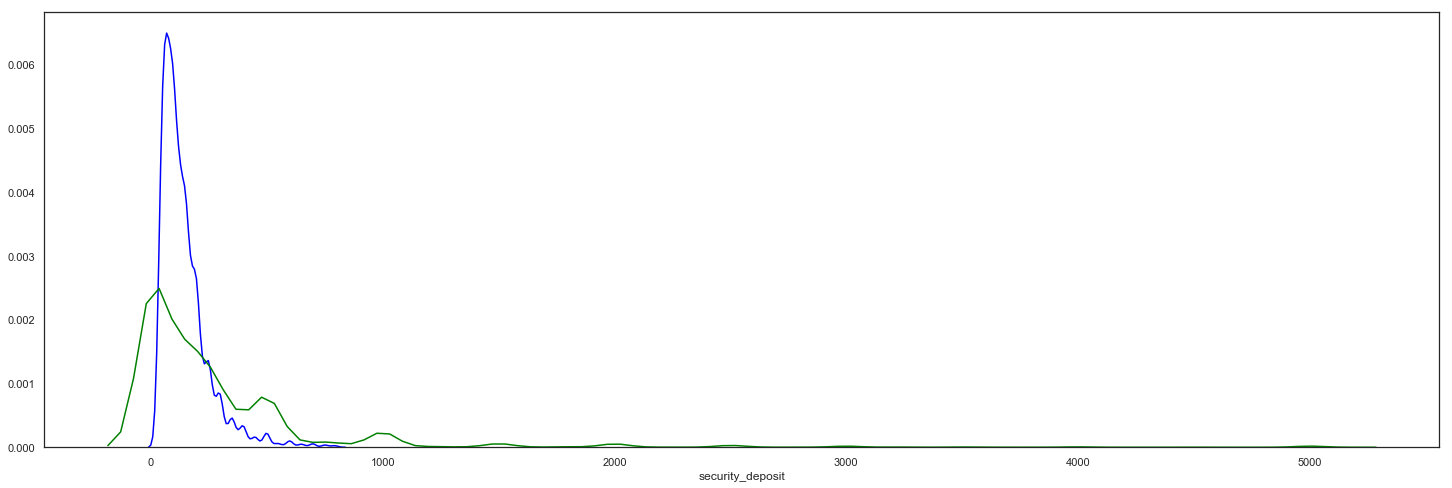

In [22]:
f, ax = plt.subplots(1, 1, figsize=(25, 8))
sns.distplot(tmp["price"], ax=ax, hist=False, kde=True, color="blue")
sns.distplot(tmp["security_deposit"], ax=ax, hist=False, kde=True, color="green")

Definitely have to fill with median. Nothing else can really help over here.

# Cleaning Fee

In [23]:
listings['cleaning_fee'] = listings['cleaning_fee'].str.strip('$').str.replace(',', '').astype('float')

In [24]:
tmp = listings[["price", "cleaning_fee"]]
tmp = tmp.dropna()
tmp.corr()

,price,cleaning_fee
price,1.000000,0.554281
cleaning_fee,0.554281,1.000000


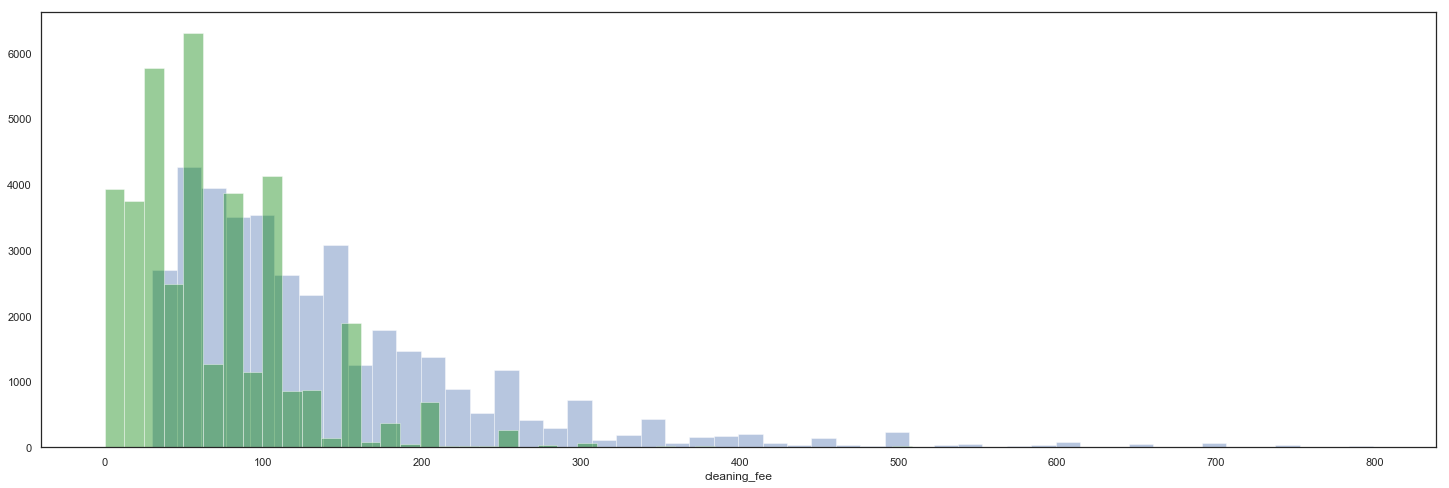

In [25]:
f, ax = plt.subplots(1, 1, figsize=(25, 8))
sns.distplot(tmp["price"], ax=ax, hist=True, kde=False)
sns.distplot(tmp["cleaning_fee"], ax=ax, hist=True, kde=False, color="green")

Definitely have to fill with median. Nothing else can really help over here.

# Neighbourhood Group

In [26]:
listings["neighbourhood_group_cleansed"].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

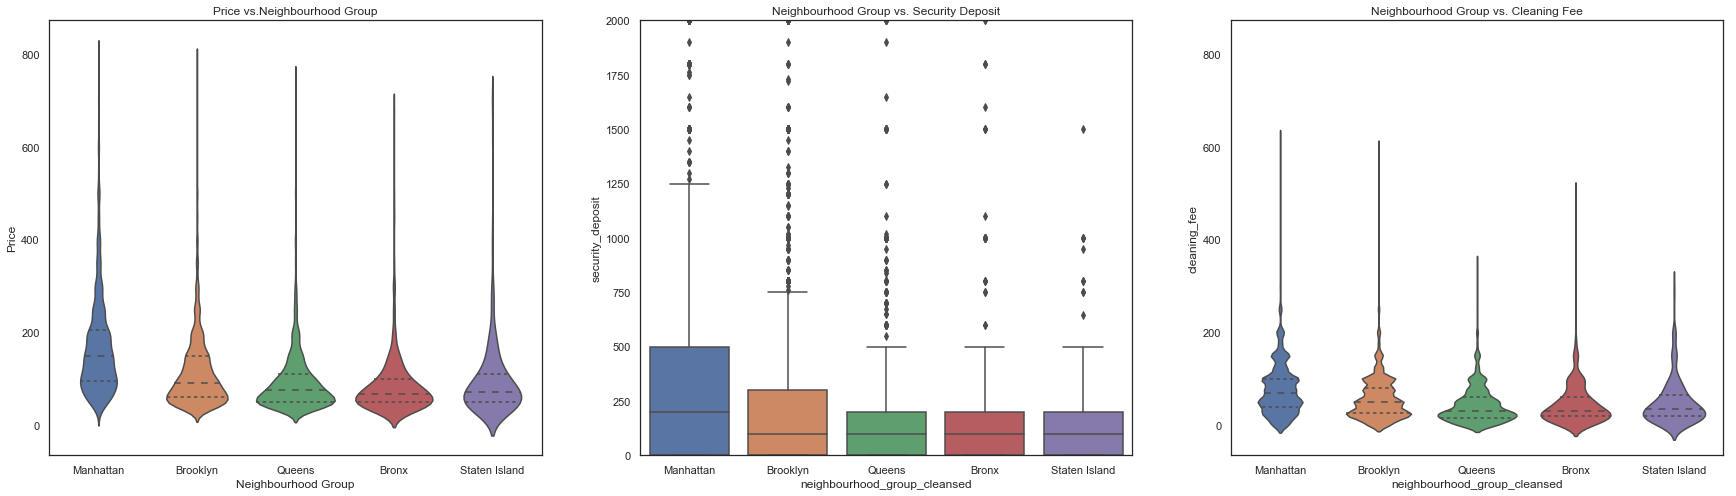

In [27]:
f, ax = plt.subplots(1,3,figsize=(30, 8))
g = sns.violinplot(x="neighbourhood_group_cleansed", y="price", data=listings, ax=ax[0], inner="quartile")
t = g.set_title("Price vs.Neighbourhood Group")
t = g.set_ylabel("Price")
t = g.set_xlabel("Neighbourhood Group")
matching_ylim = g.get_ylim()
g = sns.boxplot(x="neighbourhood_group_cleansed", y="security_deposit", data=listings, ax=ax[1])
t = g.set_title("Neighbourhood Group vs. Security Deposit")
t = g.set_ylim([0, 2000])
g = sns.violinplot(x="neighbourhood_group_cleansed", y="cleaning_fee", data=listings, ax=ax[2], inner="quartile")
t = g.set_title("Neighbourhood Group vs. Cleaning Fee")
t = g.set_ylim(matching_ylim)

# Property Type and Bedrooms

Club the lower frequency elements together

In [28]:
strings = ("Apartment", "House", "Townhouse", "Loft", "Condominium", "Serviced apartment")
apartment_list = list([])
for line in listings['property_type']:
    if any(s in line for s in strings):
        apartment_list.append('yes')
    else:
        apartment_list.append('no')

listings['prop'] = apartment_list
listings.loc[listings['prop'] == 'no', 'property_type'] = 'Other'
listings.loc[listings['property_type'] == 'Houseboat', 'property_type'] = 'Other'
listings.drop(['prop'], axis=1, inplace=True)

In [29]:
listings["property_type"].value_counts()

Apartment             39503
House                  3603
Townhouse              1557
Loft                   1447
Condominium            1370
Other                  1066
Serviced apartment      705
Name: property_type, dtype: int64

Group all bedrooms 10 and above into one category 10+

In [30]:
def group_bedrooms(row):
    if row < 10:
        return str(int(row))
    elif row >= 10:
        return "10+"
    else:
        return row
    
listings["bedroom_group"] = listings["bedrooms"].apply(group_bedrooms)
# listings[["bedrooms", "bedroom_group"]]

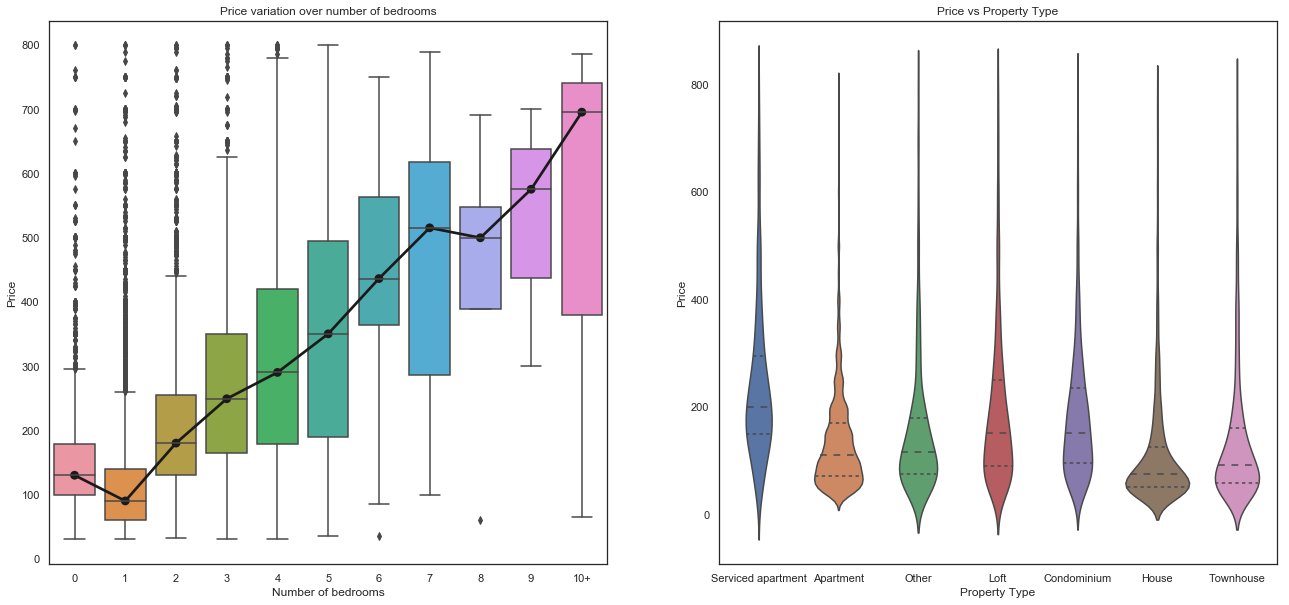

In [31]:
f, ax = plt.subplots(1,2,figsize=(22, 10))
# plot_box(x="bedroom_group", y="price", data=listings, agg_rule="median", ax=ax[0], title="price vs Bedrooms")

listings['bedroom_group'] = pd.Categorical(
    listings['bedroom_group'], 
    categories=['0','1','2','3','4','5','6', '7', '8', '9', '10+'], 
    ordered=True
)
listings.sort_values(by="bedroom_group", inplace=True)

g = sns.boxplot(x="bedroom_group", y="price", data=listings, ax=ax[0])

agg_data = listings[["price", "bedroom_group"]].groupby(by=["bedroom_group"], as_index=False).median()
g = sns.pointplot(x="bedroom_group", y="price", data=agg_data, ax=ax[0], color="k")
t = g.set(title="Price variation over number of bedrooms", xlabel="Number of bedrooms", ylabel="Price")

g = sns.violinplot(x="property_type", y="price", data=listings, ax=ax[1], inner="quartile")
ty = g.set(title="Price vs Property Type")
t = g.set_ylabel("Price")
t = g.set_xlabel("Property Type")

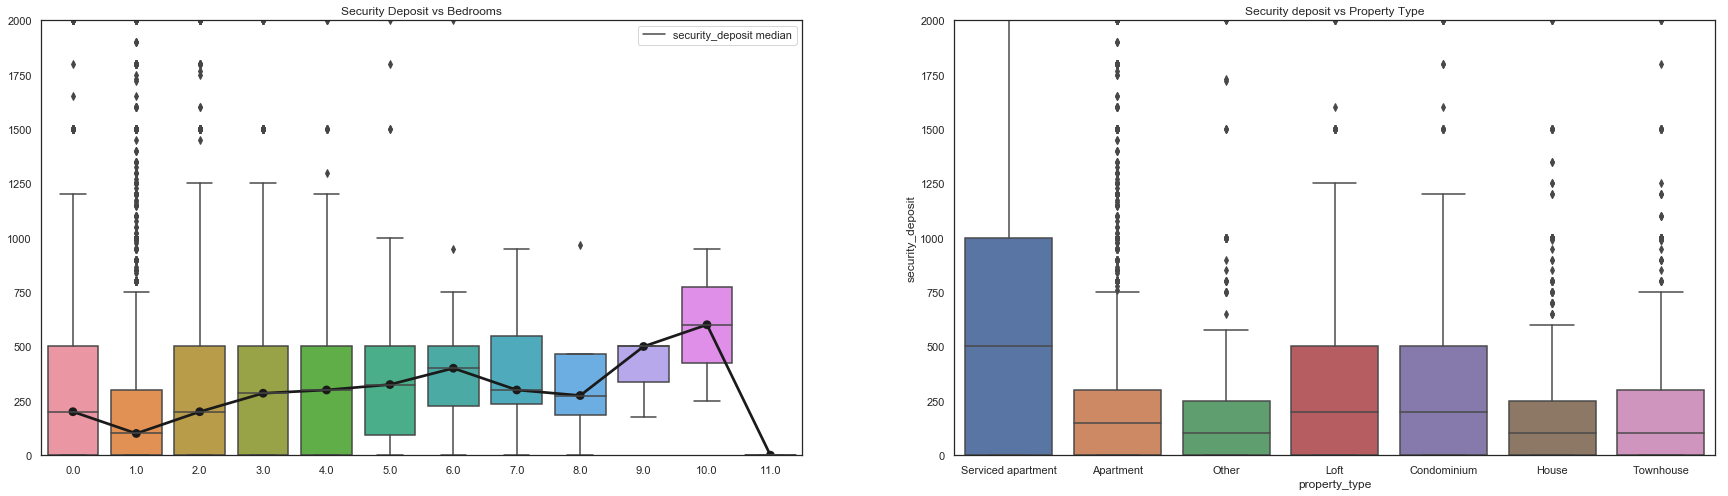

In [32]:
f, ax = plt.subplots(1,2,figsize=(30, 8))
plot_box(x="bedrooms", y="security_deposit", data=listings, agg_rule="median", ax=ax[0], ylim=2000, title="Security Deposit vs Bedrooms")
g = sns.boxplot(x="property_type", y="security_deposit", data=listings, ax=ax[1])
g.set(title="Security deposit vs Property Type")
yl = g.set_ylim(0,2000)

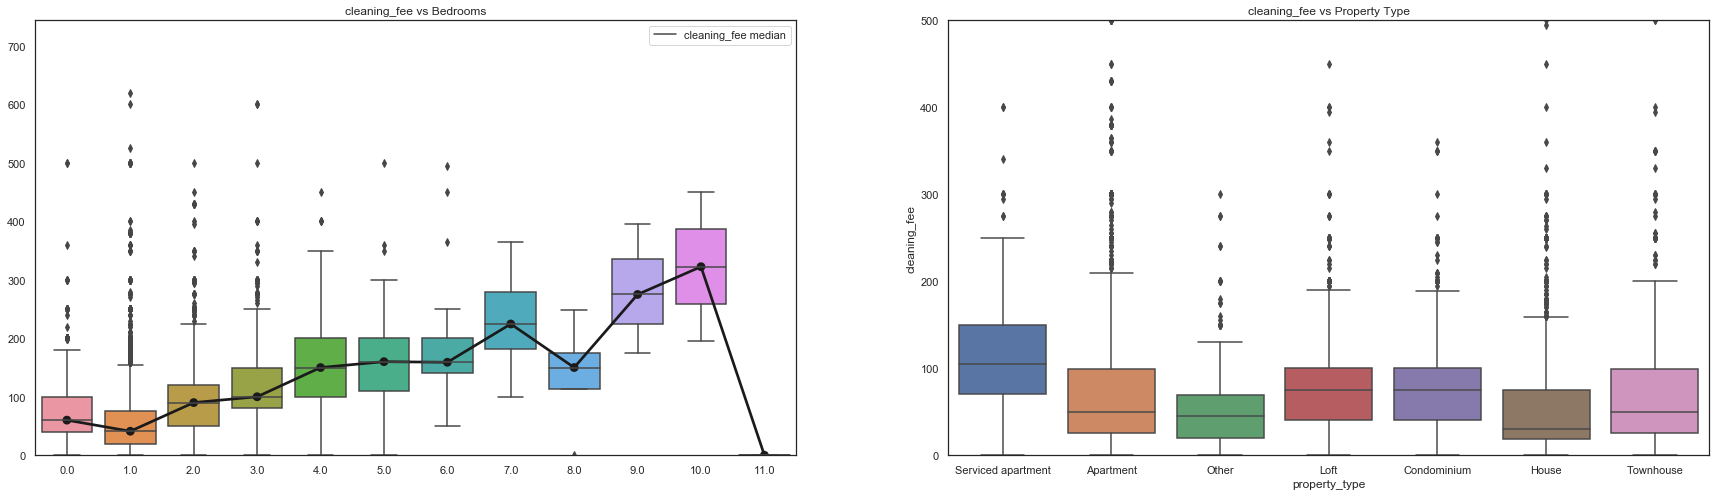

In [33]:
f, ax = plt.subplots(1,2,figsize=(30, 8))
plot_box(x="bedrooms", y="cleaning_fee", data=listings, agg_rule="median", ax=ax[0], title="cleaning_fee vs Bedrooms")
g = sns.boxplot(x="property_type", y="cleaning_fee", data=listings, ax=ax[1])
g.set(title="cleaning_fee vs Property Type")
yl = g.set_ylim(0,500)

How do amenities behave for each property type?

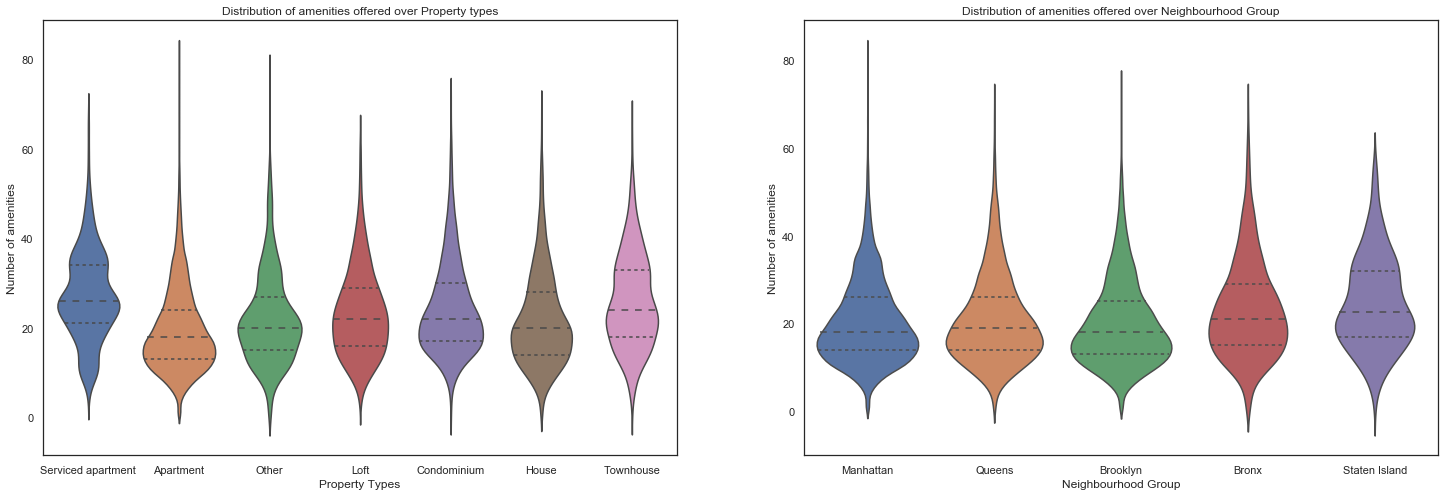

In [34]:
# listings[["num_amenities", "property_type"]].head()
f, ax = plt.subplots(1, 2, figsize=(25, 8))
g = sns.violinplot(x="property_type", y="num_amenities", data=listings, ax=ax[0], inner="quartile")
t = g.set(title="Distribution of amenities offered over Property types", xlabel="Property Types", ylabel="Number of amenities")
g = sns.violinplot(x="neighbourhood_group_cleansed", y="num_amenities", data=listings, ax=ax[1], inner="quartile")
t = g.set(title="Distribution of amenities offered over Neighbourhood Group", xlabel="Neighbourhood Group", ylabel="Number of amenities")

# Super Hosts 

In [35]:
shost_subset = listings[["host_is_superhost", "neighbourhood_group_cleansed", "price", "id"]]

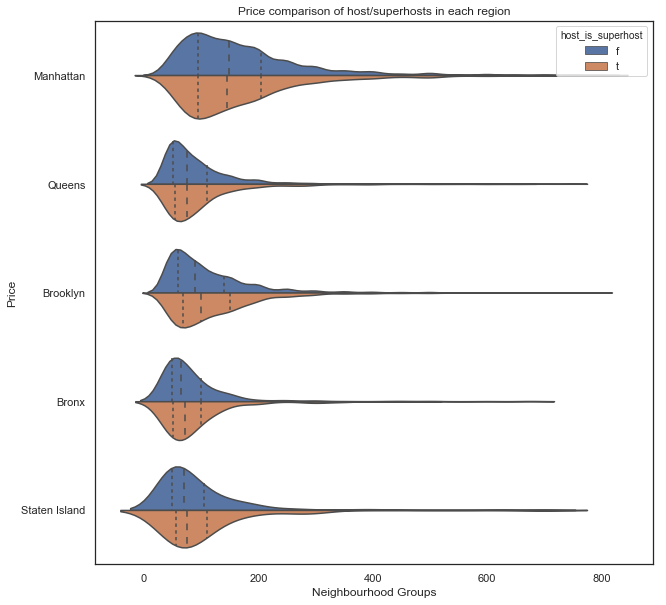

In [36]:
import seaborn as sns
# sns.set(style="whitegrid")
f, ax = plt.subplots(1,1,figsize=(10, 10))
# g = sns.boxplot(y="neighbourhood_group_cleansed", x="price", data=shost_subset, hue="host_is_superhost", ax=ax, split=True)
g = sns.violinplot(y="neighbourhood_group_cleansed", x="price", data=shost_subset, hue="host_is_superhost", ax=ax , split=True, inner="quartile")
t = g.set(title="Price comparison of host/superhosts in each region", xlabel="Neighbourhood Groups", ylabel="Price")

110.0

105.0

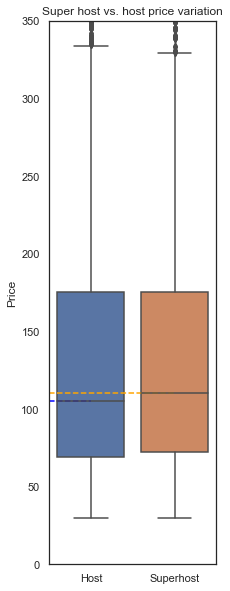

In [83]:
f, ax = plt.subplots(1, 1, figsize=(3, 10))
shost_subset["dummy"] = 1
g = sns.boxplot(x="host_is_superhost", y="price", data=shost_subset, ax=ax)
yl = g.set(ylim=[0, 350], title="Super host vs. host price variation", xlabel="", ylabel="Price")
g.set_xticklabels(["Host", "Superhost"])
shost_median = shost_subset[shost_subset["host_is_superhost"]=="t"]["price"].median()
host_median = shost_subset[shost_subset["host_is_superhost"]=="f"]["price"].median()
l = plt.axhline(y=shost_median, xmax=0.75, color="orange", linestyle="--")
l = plt.axhline(y=host_median, xmax=0.25, color="blue", linestyle="--")
display(shost_median, host_median)